In [5]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

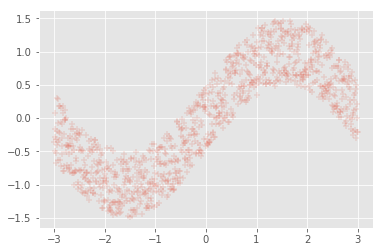

In [6]:
# generate sine wave with uniform noise added to it
n_samples = 1000
xs = np.linspace(-3, 3, n_samples)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_samples)
plt.scatter(xs, ys, alpha=0.15, marker='+')

### Trying to fit straight lines for Sine function

In [8]:
X = tf.placeholder(tf.float32, name='X')

Y = tf.placeholder(tf.float32, name='Y')

W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')

# Y = mx + c
Y_pred = X * W + B

In [9]:
# this function will measure the absolute distance, also known as the l1-norm
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [11]:
cost = tf.reduce_mean(distance(Y_pred, Y))

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

C:\Users\ravindra\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.6204
0.512149
0.464361
0.44328
0.431809
0.427155
0.424825
0.423656
0.42308
0.422781
0.422711


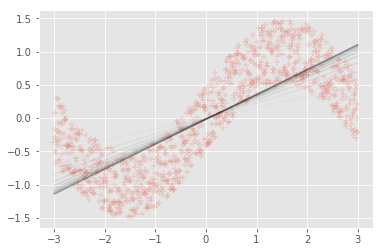

In [13]:
# We create a session to use the graph
n_iterations = 500

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

In [14]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set W and b to their initial random normal value.
        sess.run(tf.global_variables_initializer())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()

2.34954
2.01626
2.37733
2.33864
1.63929
1.66445
2.22949
1.15842
1.55532
1.94885


C:\Users\ravindra\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


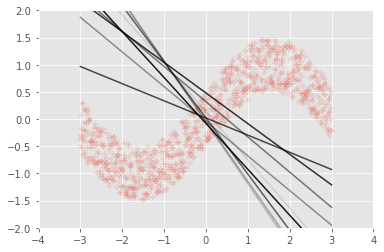

In [15]:
# We're going to multiply our input by 100 values, creating an "inner layer"
# of 100 neurons.
n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# Instead of multiplying directly, we use tf.matmul to perform a
# matrix multiplication
h = tf.matmul(tf.expand_dims(X, 1), W) + b

# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with our new Y_pred
train(X, Y, Y_pred)

Tensor("weight_3/read:0", shape=(1,), dtype=float32)
0.789287
0.50179
0.54162
0.602909
0.405677
0.577009
0.717526
0.603208
0.721774
0.619585


C:\Users\ravindra\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


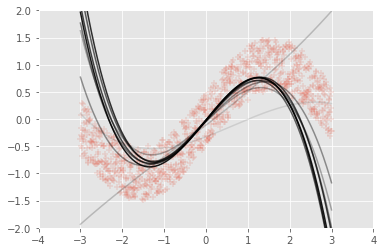

In [17]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 4):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)
print(W)
# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

20.4066
18.2136
28.8237
13.9397
27.5863
3.85294
13.3892
6.70569
17.3266
9.80647


C:\Users\ravindra\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


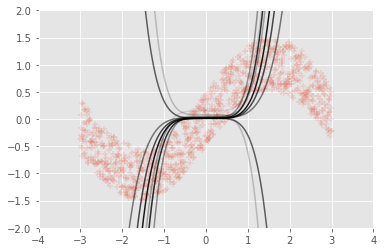

In [19]:
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_5')
Y_pred = tf.add(tf.multiply(tf.pow(X, 5), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

## Different non linearity functions

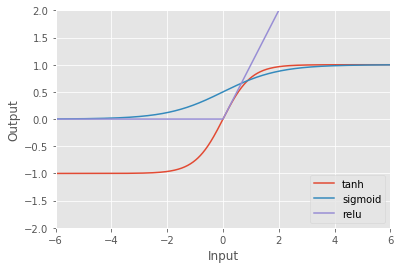

In [24]:
sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

0.403211
0.288543
0.275658
0.271052
0.269225
0.268239
0.267661
0.267341
0.267123
0.266921


C:\Users\ravindra\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


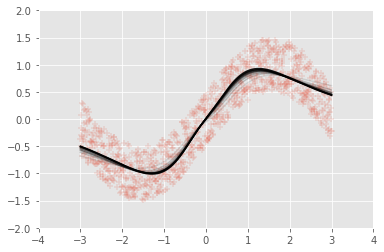

In [25]:
# We're going to multiply our input by 10 values, creating an "inner layer"
# of n_neurons neurons.
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')

# Instead of just multiplying, we'll put our n_neuron multiplications through a non-linearity, the tanh function.
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')

Y_pred = tf.reduce_sum(h, 1)

# And retrain w/ our new Y_pred
train(X, Y, Y_pred)